*** Dıognose Data for Cleaning Data ***

---
Veri temizleme, bir kayıt kümesindeki bozuk veya hatalı kayıtları tespit etme ve düzeltme (veya kaldırma) işlemidir.
Bu bozuklukları tespit etmek için bazı teknikler:


1. Missing Data
2. Irregular Data(Outliers)
3. Unnecessary Data— Repetitive Data, Duplicates and more
4. Inconsistent Data — Capitalization, Addresses and more


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from subprocess import check_output
print(check_output(["ls", "/content/pokemon.csv"]).decode("utf8"))

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/pokemon.csv



In [9]:
pokemon=pd.read_csv("pokemon.csv")
pokemon.head() # head ilk 5 satırı getirir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [12]:
pokemon.tail() #tail fonkiyonu son 5 satırı gösterir.

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [14]:
pokemon.columns  #sütun isimlerini verir.

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [16]:
pokemon.shape #pokemon.csv veri setindeki satır ve sütun sayısını verir.


(800, 12)

In [17]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB



***EXPLORATORY DATA ANALYSIS (EDA)***

---
EDA veri setlerini ana özelliklerini özetleyerek anlamaktır ve genellikle görsel olarak grafiğe döker.
Makine öğrenimi algoritmalarımıza beslediğimiz özelliklerin iyileştirilmesini ve geçerli, doğru yorumlanmış sonuçlar almamızı sağlamak için veri setinin içeriğini anlamak ve özetlemek için kullanılır.

(EDA için daha fazla bilgi edinmek istiyorsanız buraya göz atabilirsiniz.-> https://ichi.pro/tr/python-da-kesfedici-veri-analizi-eda-228103481339181



In [18]:
print(pokemon["Type 1"].value_counts(dropna=False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [20]:
pokemon.describe() #boş girişleri yok say.


,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


***VISUAL EXPLORATORY DATA ANALYSIS***

---



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


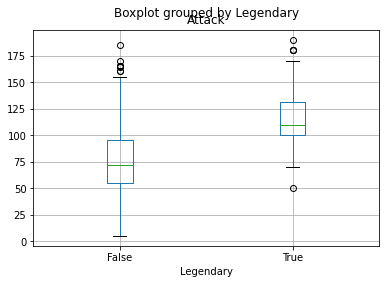

In [21]:
pokemon.boxplot(column='Attack',by = 'Legendary')

Yukarıda pokemonların legendary karşılaştırılması bulunmaktadır.


*  Üstteki siyah çizgi max değer gösterir.
*  Üstteki mavi çizgi 75%
*  Yeşil çizgi medyanı gösterir.(50%)
*  Alttaki mavi çizgi 25%
*  Attaki siyah çizgi min değer.
*  Aykırı değer yoktur.








***TIDY DATA***

---


*  Her sütun bir değişkeni temsil eder.
*  Her satır bir gözlemi temsil eder.
*  Her bir gözlem birimi br tablo oluşturur.







In [22]:
pokemon_new=pokemon.head() #yalnız 5 satırı yeni pokemon değişkenine atar.
pokemon_new

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Melt fonksiyonundaki var_name argümanı ile birleştirdiğimiz sütunları aktaracağımız yeni sütunun adını, value_name argümanı ile ise bu yeni sütunun değerlerini saklayan sütunun adını atamamıza yarıyor.

Tidy Data için detaylı bilgi almak için şu siteyi ziyaret edebilirsiniz ->>https://www.veribilimiokulu.com/python-ile-tidy-data/

In [23]:
melted = pd.melt(frame=pokemon_new,id_vars = 'Name', value_vars= ['Attack','Defense'])
melted

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
5,Bulbasaur,Defense,49
6,Ivysaur,Defense,63
7,Venusaur,Defense,83
8,Mega Venusaur,Defense,123
9,Charmander,Defense,43



***PIVOTING DATA***


---
**pandas.pivot(dizin, sütunlar, değerler)** işlevi, DataFrame'in 3 sütununu temel alan bir pivot tablo üretir. Dizin/sütunlardan benzersiz değerler kullanır ve değerlerle doldurur.

*Parametreler*:

***index[ndrarray]***= Yeni frame'in indexini oluşturmak için kullanılacak etiketler.

***columns[ndarray]***= Yeni frame'in sütunlarını oluşturmak için kullanılacak etiketler.

***values[ndarray]***= Yeni frame değerlerini doldurmak için kullanılacak değerler. 

***Returns***= Yeniden Şekillendirilmiş DataFrame

***Exception***= Herhangi bir kopya olması durumunda ValueError






In [30]:
melted.pivot(index = 'Name', columns = 'variable',values='value')

variable,Attack,Defense
Name,,
Bulbasaur,49,49
Charmander,52,43
Ivysaur,62,63
Mega Venusaur,100,123
Venusaur,82,83


***CONCATENATING DATA***

---
İki data frame birleştirmek için kullanılır.



In [29]:
data1 = pokemon.head()
data2= pokemon.tail()    #iki tane data frame oluşturuldu.
conc_data_row = pd.concat([data1,data2],axis =0,ignore_index =True) # axis = 0 : adds dataframes in row
conc_data_row

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
6,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
7,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
8,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
9,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True



***DATA TYPES***

---
5 temel veri türü vardır: nesne(string), boolean, tamsayı, kayan nokta ve kategorik. str'den kategorik'e veya int'den float'a gibi dönüştürme veri türlerini yapabiliriz.

Kategori neden önemlidir: veri çerçevesini bellekte küçültmek, özellikle sklearn için analiz için kullanılabilir


In [31]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [32]:
pokemon['Type 1'] = pokemon['Type 1'].astype('category')
pokemon['Speed'] = pokemon['Speed'].astype('float')

In [34]:
pokemon.dtypes #aşağıda Type1'in dtype olarak değiştiğini fakat Type2'nin float olarak değişmediği görülmekte.

#                int64
Name            object
Type 1        category
Type 2          object
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed          float64
Generation       int64
Legendary         bool
dtype: object

***MISSING DATA and TESTING WITH ASSERT***

---
Eksik Veri, pandas'da NA (Kullanılamaz) değerler olarak da ifade edilebilir. DataFrame'de bazen birçok veri kümesi,var olduğu ve toplanmadığı ya da hiç var olmadığı için eksik verilerle gelir.

None:None,Python kodundaki eksik veriler için sıklıkla kullanılan bir Python nesnesidir.

NaN:Sayı olmayan.

In [36]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        799 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      414 non-null    object  
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    float64 
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(1), float64(1), int64(7), object(2)
memory usage: 64.9+ KB


In [38]:
pokemon["Type 2"].value_counts(dropna =False) #386 adet NaN değer olduğunu göstermektedir.

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [47]:
pokemon1=pokemon   
pokemon1["Type 2"].dropna(inplace = True) #Boş ya da NaN değerleri silme- dropna()
#inplace= True, onu yeni değişkene atamadığımız anlamına gelir. Değişiklikler otomatik olarak atanır

**assert-->** Kodunuzdaki bir koşulun True döndürüp döndürmediğini test eder

In [41]:
assert 1==1 # doğru olduğu için bir şey döndürmez.

In [46]:
#assert  pokemon['Type 2'].notnull().all()

In [43]:
pokemon["Type 2"].fillna('empty',inplace = True) #Boş ya da nan değerlerin yerine değer atama- fillna()

In [45]:
assert  pokemon['Type 2'].notnull().all()